In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
from sklearn.cluster import KMeans
%matplotlib inline

In [17]:
parking_data = pd.read_csv('/content/parking_birmingham.csv')
parking_data.describe()

,Capacity,Occupancy
count,35717.000000,35717.000000
mean,1397.550130,642.228911
std,1179.326833,656.955535
min,220.000000,-8.000000
25%,500.000000,210.000000
50%,849.000000,446.000000
75%,2009.000000,798.000000
max,4675.000000,4327.000000


In [18]:
print('Before removing inconsistence data:',parking_data.shape)
parking_data.dropna(inplace = True)
parking_data.drop_duplicates(keep='first',inplace=True)
parking_data = parking_data[parking_data['Occupancy']>=0 ]
parking_data = parking_data[parking_data['Capacity']>=0 ]
false_data = parking_data[parking_data['Occupancy']> parking_data['Capacity']]
parking_data = pd.concat([parking_data, false_data]).drop_duplicates(keep=False)
print('After removing inconsistence data:',parking_data.shape)
parking_data.describe()

Before removing inconsistence data: (35717, 4)
After removing inconsistence data: (35116, 4)


,Capacity,Occupancy
count,35116.000000,35116.000000
mean,1407.923966,645.350496
std,1183.011879,660.531340
min,220.000000,0.000000
25%,577.000000,210.000000
50%,863.000000,450.000000
75%,2009.000000,799.000000
max,4675.000000,4327.000000


In [19]:
parking_data['OccupancyRate'] = (100.0*parking_data['Occupancy'])/parking_data['Capacity']
dateTime = parking_data['LastUpdated'].str.split(" ", n = 1, expand = True)
date = dateTime[0]
time = dateTime[1]
parking_data['Date'] = date
parking_data['Time'] = time
day_name = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
parking_data['DayOfWeek'] = pd.to_datetime(parking_data['Date']).dt.dayofweek.apply(lambda x: day_name[x])
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35116 entries, 0 to 35716
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SystemCodeNumber  35116 non-null  object 
 1   Capacity          35116 non-null  int64  
 2   Occupancy         35116 non-null  int64  
 3   LastUpdated       35116 non-null  object 
 4   OccupancyRate     35116 non-null  float64
 5   Date              35116 non-null  object 
 6   Time              35116 non-null  object 
 7   DayOfWeek         35116 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ MB


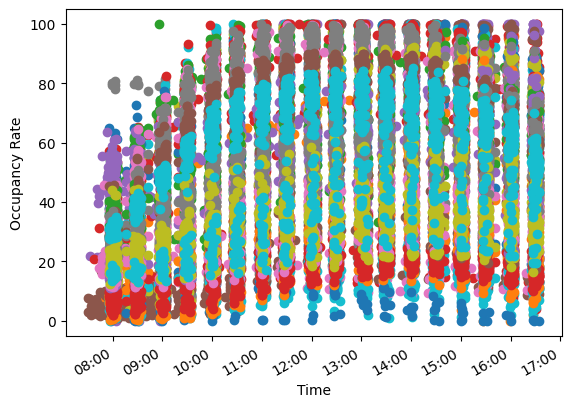

In [20]:
plt.plot([],[])
park_name = parking_data['SystemCodeNumber'].unique()
#print(park_name)
for i in range(len(park_name)):
    s = park_name[i]
    rate = parking_data[parking_data['SystemCodeNumber'] == s]['OccupancyRate']
    time=pd.to_datetime(parking_data[parking_data['SystemCodeNumber'] == s]['Time'],format='%H:%M:%S')
    plt.scatter(time,rate,label=s)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.show()
plt.close()

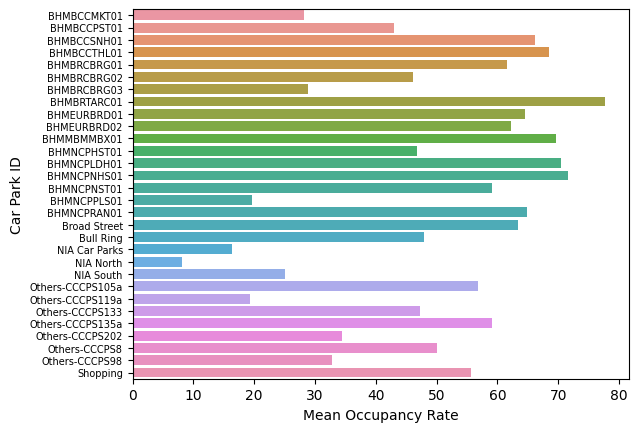

In [21]:
xData = parking_data.groupby('SystemCodeNumber')['OccupancyRate'].mean()
key_list = list(xData.keys())
val_list = []
for x in key_list:
    val_list.append(xData[x])
df = pd.DataFrame(list(zip(key_list, val_list)),
               columns =['Park ID', 'Mean Occupancy Rate'])
ax = sns.barplot(y='Park ID',x='Mean Occupancy Rate',data=df,orient="h")
ax.set(ylabel="Car Park ID", xlabel = "Mean Occupancy Rate")
ax.tick_params(axis='y', labelsize=7)

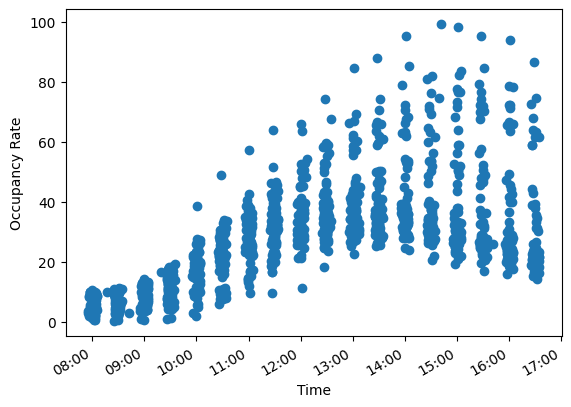

In [22]:
for i in range(1):
    s = park_name[i]
    rate = parking_data[parking_data['SystemCodeNumber'] == s]['OccupancyRate']
    time=pd.to_datetime(parking_data[parking_data['SystemCodeNumber'] == s]['Time'],format='%H:%M:%S')
    plt.scatter(time,rate,label=s)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.show()
plt.close()

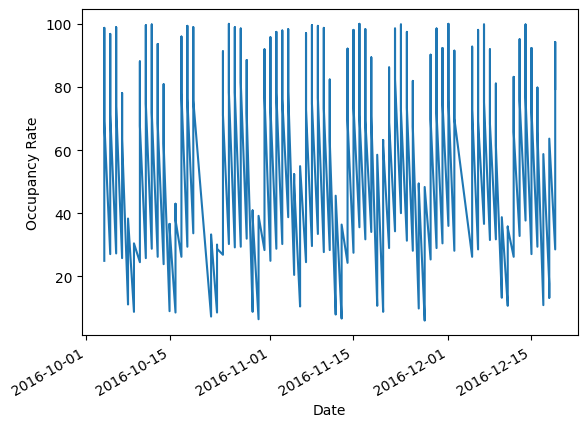

In [23]:
park_name = ['BHMEURBRD01']
for i in range(len(park_name)):
    s = park_name[i]
    rate = parking_data[parking_data['SystemCodeNumber'] == s]['OccupancyRate']
    time=pd.to_datetime(parking_data[parking_data['SystemCodeNumber'] == s]['Date'])
    plt.plot(time,rate)
    plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Occupancy Rate')
plt.show()
plt.close()

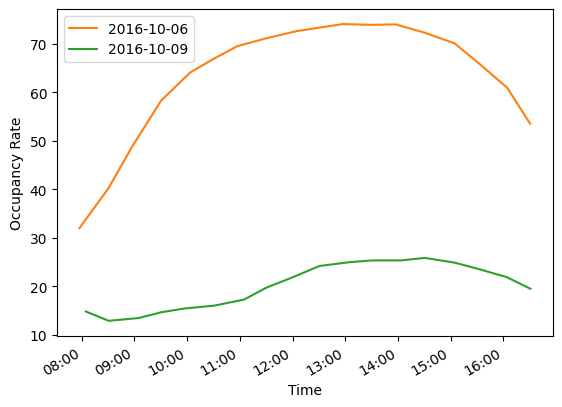

In [24]:
plt.plot([],[])

rate = parking_data[parking_data['SystemCodeNumber'] == 'Shopping']
rate = rate[rate['Date'] == '2016-10-06']['OccupancyRate']
time = parking_data[parking_data['SystemCodeNumber'] == 'Shopping']
time=pd.to_datetime(time[time['Date'] == '2016-10-06']['Time'],format='%H:%M:%S')
plt.plot(time,rate,label='2016-10-06')

rate = parking_data[parking_data['SystemCodeNumber'] == 'Shopping']
rate = rate[rate['Date'] == '2016-10-09']['OccupancyRate']
time = parking_data[parking_data['SystemCodeNumber'] == 'Shopping']
time=pd.to_datetime(time[time['Date'] == '2016-10-09']['Time'],format='%H:%M:%S')
plt.plot(time,rate,label='2016-10-09')



plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xlabel('Time')
plt.ylabel('Occupancy Rate')
plt.legend()
plt.show()
plt.close()

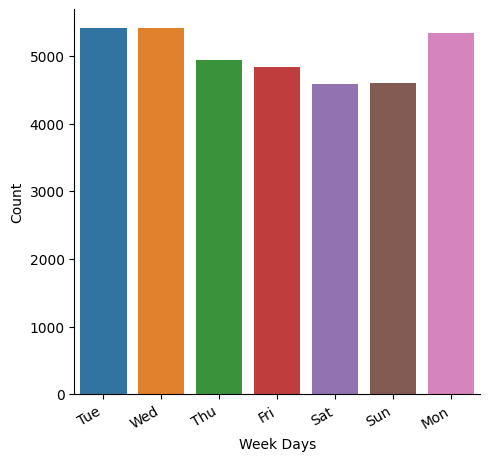

In [25]:
ax = sns.catplot(x='DayOfWeek',kind='count',data=parking_data,orient="h")
ax.fig.autofmt_xdate()
ax.set(xlabel="Week Days", ylabel = "Count")

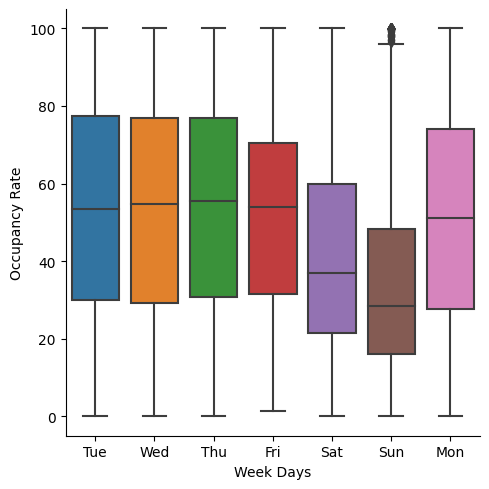

In [26]:
ax = sns.catplot(x = "DayOfWeek",y="OccupancyRate",kind='box',data=parking_data)
ax.set(xlabel="Week Days", ylabel = "Occupancy Rate")

[Text(50.72222222222221, 0.5, 'Car Park ID'),
 Text(0.5, 23.52222222222222, 'Date')]

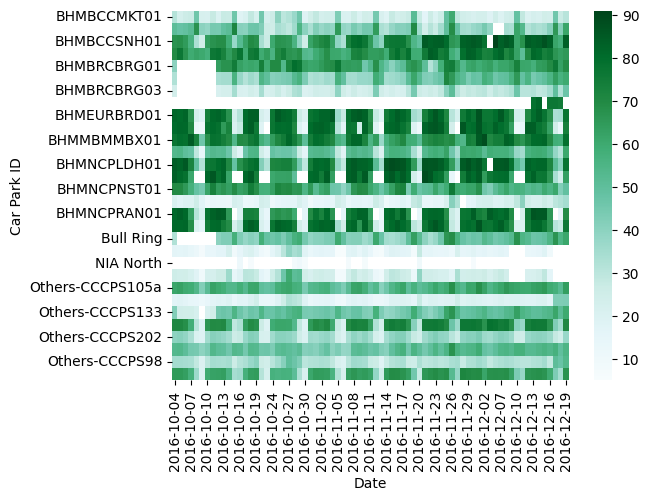

In [27]:
heatmap_data = pd.pivot_table(parking_data, values='OccupancyRate',
                     index=['SystemCodeNumber'],
                     columns='Date')
ax = sns.heatmap(heatmap_data , cmap="BuGn")
ax.set(ylabel="Car Park ID", xlabel = "Date")

In [28]:
test_data = parking_data[(pd.to_datetime(parking_data['Date']) >= pd.to_datetime('2016-12-13'))]
train_data = pd.concat([parking_data, test_data]).drop_duplicates(keep=False)
print('Train data size:',train_data.shape)
print('Test data size:',test_data.shape)
train_data.to_csv('train.csv',index=False)
test_data.to_csv('test.csv',index=False)

Train data size: (31764, 8)
Test data size: (3352, 8)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0
Center: [20.83843725]
Cluster 1
Center: [82.24124901]
Cluster 2
Center: [51.1227234]


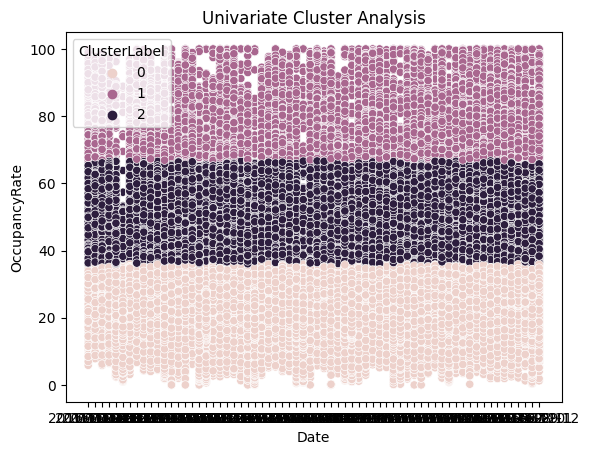

In [29]:
# Extract the feature for clustering (e.g., OccupancyRate)
feature = 'OccupancyRate'
X = train_data[feature].values.reshape(-1, 1)

# Define the number of clusters
n_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the data
train_data['ClusterLabel'] = kmeans.labels_

# Explore the clusters
cluster_centers = kmeans.cluster_centers_

# Print cluster centers
for i in range(n_clusters):
    print("Cluster", i)
    print("Center:", cluster_centers[i])

# Visualize the clusters
sns.scatterplot(data=train_data, x='Date', y=feature, hue='ClusterLabel')
plt.xlabel('Date')
plt.ylabel(feature)
plt.title('Univariate Cluster Analysis')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


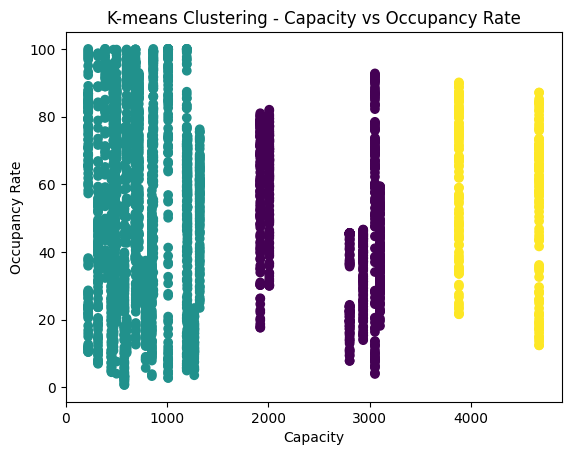

In [30]:
# Load the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Select the feature(s) for clustering
selected_features = ['OccupancyRate', 'Capacity']
train_features = train_data[selected_features]
test_features = test_data[selected_features]

# Perform k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(train_features)

# Assign cluster labels to the test data
test_labels = kmeans.predict(test_features)

# Append cluster labels to the test data
test_data['ClusterLabel'] = test_labels

# Visualize the clusters
plt.scatter(test_data['Capacity'], test_data['OccupancyRate'], c=test_data['ClusterLabel'], cmap='viridis')
plt.xlabel('Capacity')
plt.ylabel('Occupancy Rate')
plt.title('K-means Clustering - Capacity vs Occupancy Rate')
plt.show()
